In [1]:
import pydicom as dicom
import numpy as np
from pydicom.pixel_data_handlers.util import apply_modality_lut
import os 
from glob import glob 
import re 
import matplotlib.pyplot as plt

In [2]:
path = "../data/dicom/"

In [3]:
high_metal_folder = [
            sorted(
                glob(
                    os.path.join(path, "high_metal/acquisition_" + str(i) + "/*")
                ),
                key=lambda x: [
                    int(c) if c.isdigit() else c for c in re.split(r"(\d+)", x)
                ],
            )
            for i in range(11)
        ]


In [15]:
file_name = high_metal_folder[1][250]
dicom_img = dicom.dcmread(file_name)
arr = dicom_img.pixel_array
print(max(arr.flatten()))
hu = apply_modality_lut(arr, dicom_img)
clipped_hu = np.clip(hu, -1, 1)

4095


In [18]:
min(arr.flatten()), max(arr.flatten())

(0, 4095)

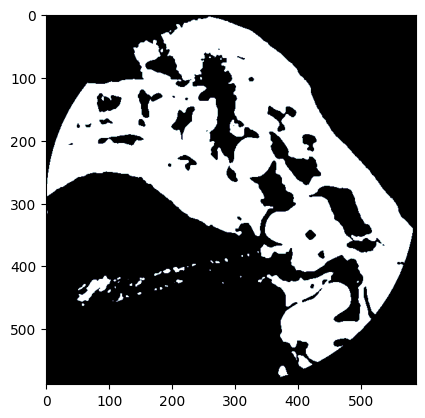

In [16]:
plt.imshow(clipped_hu, cmap=plt.cm.bone)

In [15]:
import numpy as np
import SimpleITK as sitk



# Load the CBCT image using SimpleITK
cbct_image = sitk.ReadImage(high_metal_folder[1][250])



# Convert the image to a NumPy array
cbct_array = sitk.GetArrayFromImage(cbct_image)



# Calculate the mean and standard deviation of the image
mean = np.mean(cbct_array)
std = np.std(cbct_array)



# Normalize the image
cbct_normalized = (cbct_array - mean) / std


# Convert the normalized image back to a SimpleITK image
cbct_normalized_image = sitk.GetImageFromArray(cbct_normalized)
cbct_normalized_image.SetOutputPixelType(cbct_image.GetPixelIDValue())

# Save the normalized image
sitk.WriteImage(cbct_normalized_image, "test.dcm")

AttributeError: 'Image' object has no attribute 'SetOutputPixelType'

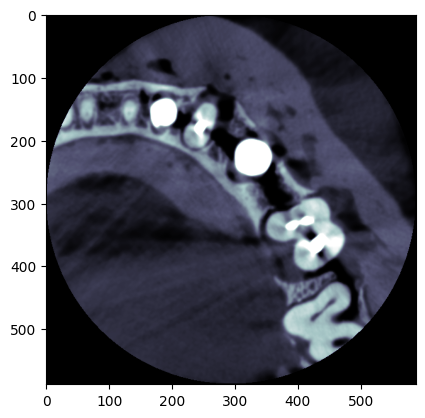

In [9]:
plt.imshow(cbct_normalized[0], cmap=plt.cm.bone)

In [10]:
cbct_normalized[0]

array([[-1.01965819, -1.01965819, -1.01965819, ..., -1.01965819,
        -1.01965819, -1.01965819],
       [-1.01965819, -1.01965819, -1.01965819, ..., -1.01965819,
        -1.01965819, -1.01965819],
       [-1.01965819, -1.01965819, -1.01965819, ..., -1.01965819,
        -1.01965819, -1.01965819],
       ...,
       [-1.01965819, -1.01965819, -1.01965819, ..., -1.01965819,
        -1.01965819, -1.01965819],
       [-1.01965819, -1.01965819, -1.01965819, ..., -1.01965819,
        -1.01965819, -1.01965819],
       [-1.01965819, -1.01965819, -1.01965819, ..., -1.01965819,
        -1.01965819, -1.01965819]])